<a href="https://colab.research.google.com/github/nidhin-koshy/ML_AI_IISc/blob/master/51_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) Classifier

In it's most basic form, SVMs are linear classifiers that try to find the optimum linear separator between classes, such that the margin between the classes is maximized. When combined with the kernel trick, SVMs are a powerful classification technique even for complex class boundaries.

## Linear SVM for separable data
The maximum linear marginizer problem can be cast as:
\begin{align}
\min_{w,b} &\frac{1}{2} \Vert w \Vert^2\\
s.t.\quad y_i (w^Tx_i+b) & \ge 1 \quad \forall i
\end{align}

The above formulation is known as the primal formulation of the SVM classifier.

The above formulation is sensitive to non-linearly separable classes and outliers. An alternative formulation that is robust to outliers and non-separable classes, and which allows a relaxation on the hard constraint for each sample point is:
\begin{align}
\min_{w,b} \frac{1}{2}\Vert w \Vert^2 &+ C\sum_{i=1}^n \xi_{i}\\
s.t.\quad y_i (w^Tx_i+b) & \ge 1-\xi_{i} \quad \forall i \\
\xi_{i} &\ge 0,
\end{align}
where $C$ is a tunable parameter that controls the tradeoff between large margins vs most points being classified correctly. A large value of $C$ ensures that most points are classified correctly but makes the model susceptible to outliers, while a smaller value of $C$ allows some misclassification, but provides a larger margin and probably better generalization. The loss function given above for the relaxed case is also known as "hinge" loss.

## Dual formulation

Most SVM classifiers solve the dual formulation of the above optimization problems. Since the above primal problems are convex optimization problems, the dual and the primary have the same solutions, and hence solving the dual is equivalent to solving the primal. 

The Lagrangian for the first primal problem can be written as:
\begin{align}
L(w,b,\alpha) = \frac{1}{2}\Vert w\Vert^2 - \sum_{i=1}^n \alpha_{i} ([y_{i} (w^Tx_i+b)-1])).
\end{align}

The dual formulation for the first primal problem is:
\begin{align}
\max_{\alpha:\alpha_i \ge 0} \min_{w,b} L(w,b,\alpha).
\end{align}

Further, it can be shown that, for a given $\alpha$, the optimal weight $w$ is of the form:
\begin{align}
w &= \sum_{i=1}^n \alpha_iy_ix_i,\\
\text{and } \sum_{i=1}^n \alpha_{i}y_{i} &= 0.
\end{align}

Substituting the form of $w$ back into the dual and using the second equality constraint, we  get the following alternative dual problem:
\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} x_{i}^Tx_{j},\\
&\text{such that } \quad \alpha_{i} \ge 0 \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

Similarly, the dual formulation for second relaxed primal formulation can be shown to be:

\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} x_{i}^Tx_{j},\\
&\text{such that } \quad 0 \le \alpha_{i} \le C \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

## Kernel Methods

In the Kernel method, we try to find an SVM classifier in a transformed space, usually a higher dimensional space. The transformation is done in the hope that in the new transformed space, the classes are linearly separable. 

As we can see from the dual formulation above, finding the SVM classifier requires computing the inner-product ($x_i^Tx_j$) between each of the sample points. If we are to find the inner product in the transformed space, the straight-forward way to do it would be to 1) transform each sample point to the transformed space, and 2) compute the inner-product in the transformed space. 

The key to the application of Kernel methods in SVM is the fact that the inner-product between each of the samples needed in the dual formulation can be computed using the un-transformed samples and the kernel function, rather than first transforming the samples and then finding the inner-product.

The dual program when using a Kernel function $K$ is:

\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} K(x_{i},x_{j}),\\
&\text{such that } \quad 0 \le \alpha_{i} \le C \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

Popular kernels in use:

* Linear Kernel : $K(x_i,x_j) = <x_i, x_j>$
* Polynomial Kernel : $K(x_i,x_j) = (1+<x_i,x_j>)^d, d>0$
* Gaussian (RBF) Kernel : $K(x_i,x_j) =e^{-\gamma(\Vert x_i - x_j\Vert^2)}, \gamma > 0$

## Linear SVM Classifier
Let us try to use the SVM classifier for a linearly separable classes.

 First let us generate few sample points.

### Import required modules/libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

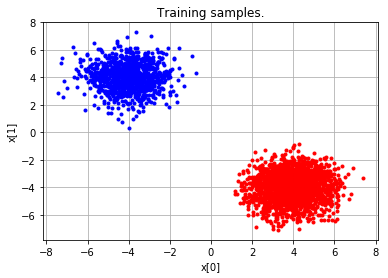

In [2]:
num_x1_samples = 1000 # number of samples from Class 1
num_x2_samples = 2000 # number of samples from Class 2

mu_1 = np.array([[-4,4]]).T # Mean of the points in Class 1
mu_2 = np.array([[4,-4]]).T # Mean of the points in Class 2

x1 = np.random.randn(num_x1_samples,2) + mu_1.T # Generate num_x1_samples points for Class 1, with mean of mu_1
y1 = np.ones((num_x1_samples,1)) # Assign a label of +1 to the samples from Class 1

x2 = np.random.randn(num_x2_samples,2) + mu_2.T # Generate num_x2_samples points for Class 2, with mean of mu_2
y2 = -1*np.ones((num_x2_samples,1)) # Assign a label of -1 to the samples from Class 2

x_train = np.concatenate((x1,x2),axis=0) # The training data will be a mix of the samples from Class 1 and Class 2. Here we are stacking the rows on top of each other
x_train = np.concatenate((x_train,np.ones((x_train[:,0].size,1))),axis=1) # We add an all ones column to the sample features. This is to account for any constant bias in the samples.
y_train = np.concatenate((y1,y2),axis=0) # Just as the sample points were concatenated, we need to concatenate the labels

#Shuffle training samples. The samples we obtain in practise might be in random order.
perm = np.random.permutation(y_train.size)

x_train = x_train[perm,:]
y_train = y_train[perm,:]


plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()

### Instantiate a linear SVM classifier


LinearSVM parameters from sklearn =  [[-0.28245777  0.2554935  -0.02430119]]


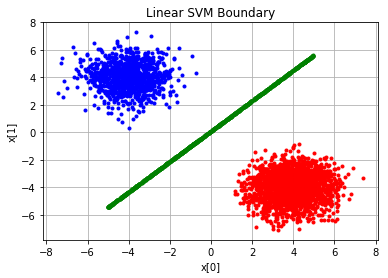

In [3]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5,loss='hinge',C=1000)
clf.fit(x_train[:,0:2],y_train[:,0])  

w_sklearn = np.array([np.append(clf.coef_,clf.intercept_)])

print("LinearSVM parameters from sklearn = ", w_sklearn)


x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Exercise

* Linear SVM is sensitive to outlier points especially when the hyper-parameter $C$ is large. Verify if the classifier bounday varies if an outlier is added to the training set.

## Non Linear SVM Classifier

### Download the artificial banana dataset. 

 This is an often used example for non-linear classification. This is a set of artificially generated data points, that are not linearly separable in the current co-ordinate system.

In [4]:
! rm -rf phpwRjVjk
! wget 'https://www.openml.org/data/download/1586217/phpwRjVjk'

--2019-08-02 15:52:14--  https://www.openml.org/data/download/1586217/phpwRjVjk
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75142 (73K) [text/plain]
Saving to: ‘phpwRjVjk’

phpwRjVjk           100%[===================>]  73.38K   276KB/s    in 0.3s    

2019-08-02 15:52:15 (276 KB/s) - ‘phpwRjVjk’ saved [75142/75142]



In [5]:
# Load the dataset as a pandas dataframe
from scipy.io import arff
import pandas as pd

data = arff.loadarff('phpwRjVjk')
df = pd.DataFrame(data[0])
df.head()

,V1,V2,Class
0,1.140,-0.114,b'1'
1,-1.520,-1.150,b'2'
2,-1.050,0.720,b'1'
3,-0.916,0.397,b'2'
4,-1.090,0.437,b'2'


In [6]:
# Reassign the class labels
df['Class'] = df['Class'].replace(to_replace={b'1':1,b'2':2})
df.head()
df.dtypes

V1       float64
V2       float64
Class      int64
dtype: object

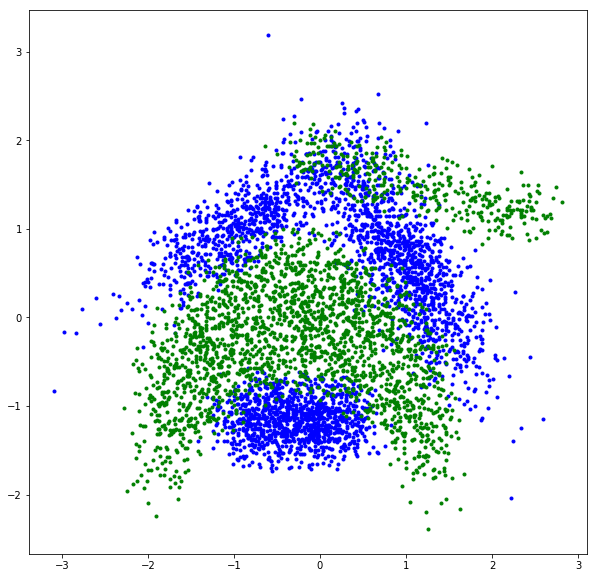

In [7]:
# plot the datapoints
plt.figure(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
x_data = df[['V1','V2']].values
y_data = df[['Class']].values
#y_data = y_data*2-3
df.describe()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42)


### Linear SVM

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVM parameters from sklearn =  [[-5.65751391e-08 -6.07088392e-08 -8.07999732e-08]]


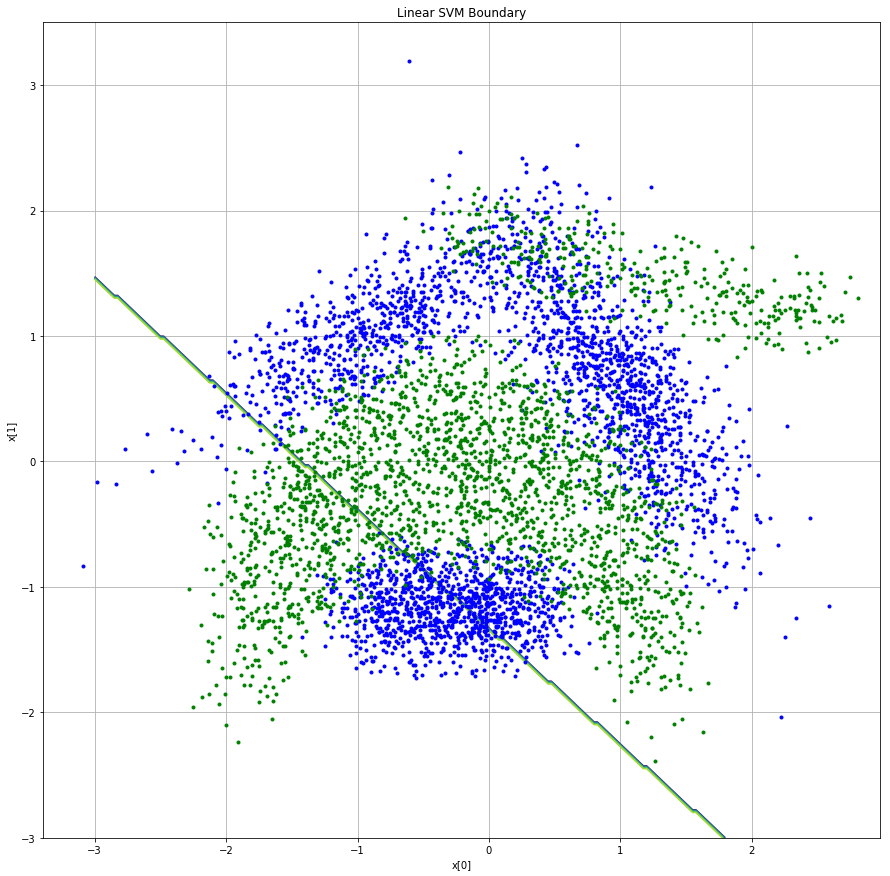

In [8]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1e-10)
clf.fit(x_train,y_train)  

w_sklearn = np.array([np.append(clf.coef_,clf.intercept_)])

print("LinearSVM parameters from sklearn = ", w_sklearn)


x1_plot = 6*np.random.rand(1000,1)-3
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)


fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot,x2_plot,'.r')
CS = ax.contour(xx, yy, Z)
plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### SVM with RBF Kernel

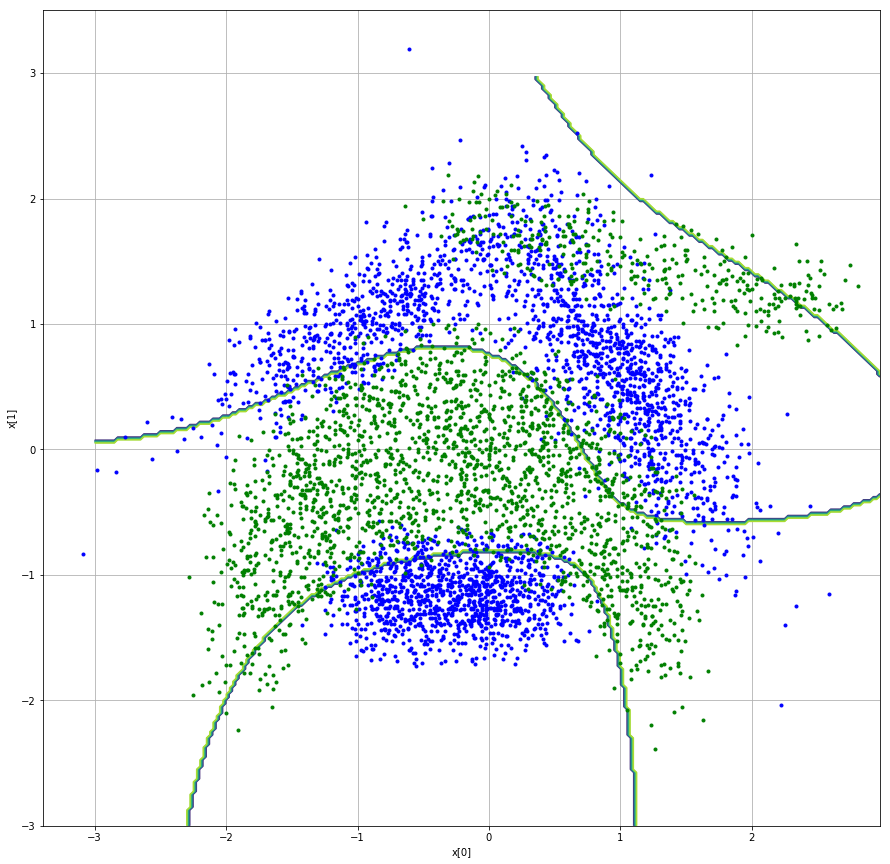

In [9]:
from sklearn.svm import SVC
clf = SVC(gamma=0.1,C=1,kernel='rbf')
clf.fit(x_train,y_train[:,0])  


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Finding good hyperparameters $\gamma$ and $C$
SVMs are sensitive to the right choice of the classifier hyper-parameters $\gamma$ and $C$. In the above example of the SVM classifier, we used $\gamma=0.1$ and $C=1$ as the hyperparameters. From visual inspection, we can observe that the class boundaries are not optimal. How can we find appropriate hyper-parameters? In this section we will use cross validation to  search for the optimum hyperparameter. 

We make use of the GridSearchCV class available with scikit-learn. GridsearchCV will span across the different hyper-parameter combinations and provide the best option. Thus we have an automated mechanism to find the best hyper-parameters.

### Exercise
* Run GridSearchCV to find the best hyper-parameter combination. Use the obtained parameters in the example above and check if the classifier boundary improves.

In [10]:
from sklearn.model_selection import GridSearchCV #import the GridSearchCV
parameters = {'gamma':('scale', 0.1,0.5,1,2), 'C':(1, 10,100)}
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5)
clf.fit(x_train,y_train[:,0])
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### SVM with Polynomial Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


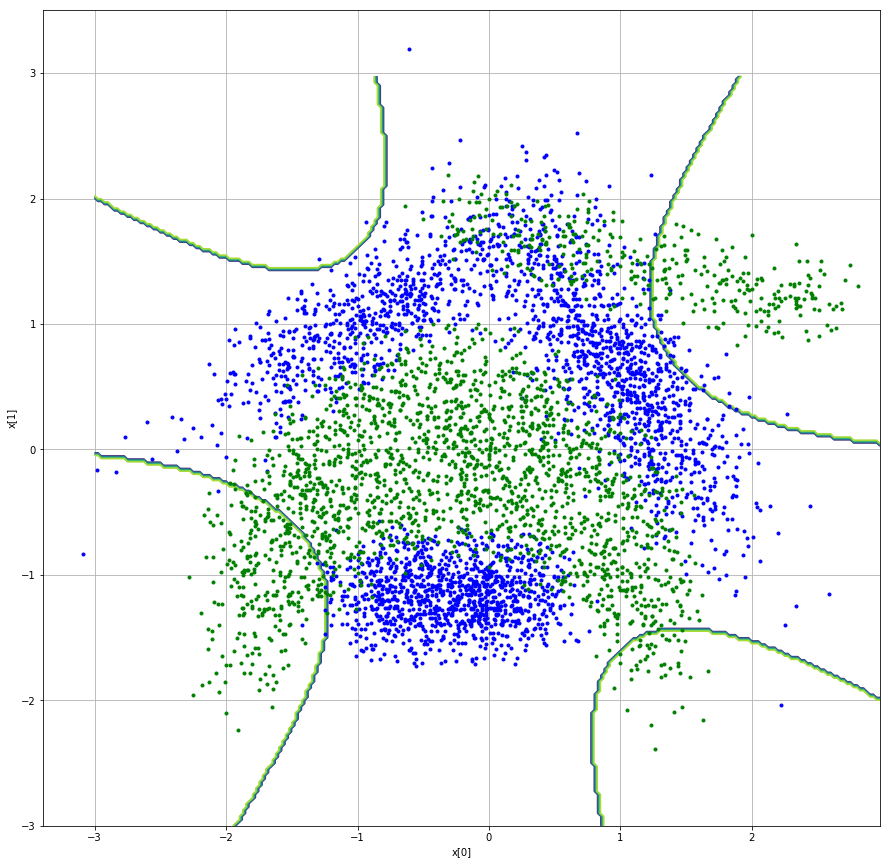

In [11]:
from sklearn.svm import SVC
clf = SVC(C=1,kernel='poly',degree=4)
clf.fit(x_train,y_train[:,0])  


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV #import the GridSearchCV
parameters = {'gamma':('scale', 1), 'C':(0.1,1)}
clf = GridSearchCV(SVC(kernel='poly',degree=4), parameters, cv=5)
clf.fit(x_train,y_train[:,0])
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## SVM Classifier for MNIST digit recognition

We will now apply the SVM classifier for the MNIST handwritten digit classification task. We had earlier run logistic regression to classify this dataset, and obtained about 84% accuracy. We will see that the SVM classifier can improve  accuracy.

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mnist_dataset = fetch_openml('mnist_784')


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

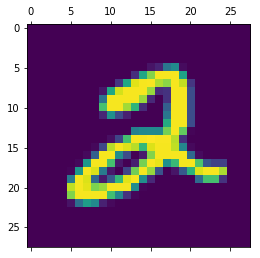

In [14]:
print(mnist_dataset.DESCR) # print description of the dataset
print(mnist_dataset.details) # print details about the dataset
print("Shape of dataset = ", mnist_dataset.data.shape)
print(mnist_dataset.target.shape)
index = 5
print("Digit Label = ", mnist_dataset.target[index])
plt.matshow(mnist_dataset.data[index].reshape(28,28))



In [15]:
from sklearn.linear_model import LogisticRegression, Perceptron # import the inbuilt LogisticRegression and Perceptron objects
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # we will split the available data into training and test data for validating the model
from sklearn.preprocessing import StandardScaler # import class to normalise data, i.e., make it zero mean and unit variance
from sklearn.metrics import confusion_matrix
scaler = StandardScaler()

num_samples = 5000
random_indices = np.random.permutation(mnist_dataset.data.shape[0])[:num_samples]
x_data = mnist_dataset.data[:num_samples,:] #  we will restrict to 1000 training samples for faster computations
y_data = mnist_dataset.target[:num_samples]

#x_data = scaler.fit_transform(x_data) # normalize data
#x_data = [(x/255)-0.5 for x in x_data]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4) # randomly split the data into training and test samples. 0.4 fraction is set aside for testing and 0.6 is used for training

classifier = SVC(gamma='scale',C=100) # DecisionTreeClassifier(max_depth=2)
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
#w_sklearn = np.array([np.append(classifier.coef_,classifier.intercept_)]) # For linear regressors : LogisticRgression,Perceptron
#print("Classification coefficients", w_sklearn) #For linear regressors: LogisticREgression, Perceptron
print("Classification score = ", classifier.score(x_test,y_test)) #Works for all classifiers
#print("[Test prediction, True Label, Test probabilities] = ", np.concatenate((np.array([classifier.predict(x_test),y_test]).T,np.round(classifier.predict_proba(x_test),2)),axis=1)) # Works for LogisticRegression. Prints the estimated class probabilities.

y_predict = classifier.predict(x_test)
confu_matrix = confusion_matrix(y_test,y_predict) # obtain the confusion matrix
print("Confusion Matrix = \n", confu_matrix)

Classification score =  0.957
Confusion Matrix = 
 [[187   0   1   2   0   0   0   0   0   1]
 [  0 214   1   1   1   0   0   1   0   0]
 [  0   2 185   0   3   0   1   1   0   0]
 [  0   2   3 192   0   4   0   1   1   2]
 [  0   2   0   0 209   0   1   1   0   3]
 [  0   0   0   6   1 167   1   0   1   2]
 [  0   2   0   0   1   0 196   0   0   0]
 [  2   3   2   5   5   0   0 217   0   1]
 [  0   0   4   2   0   4   2   0 168   1]
 [  2   1   0   0   2   0   0   1   0 179]]


In [17]:
from sklearn.model_selection import GridSearchCV #import the GridSearchCV
parameters = {'gamma':('scale', 1,2,0.1), 'C':(1,10,100)}
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [18]:
y_predict = clf.predict(x_test)
confu_matrix = confusion_matrix(y_test,y_predict) # obtain the confusion matrix
print("Classification score = ", clf.score(x_test,y_test)) #Works for all classifiers
print("Confusion Matrix = \n", confu_matrix)

Classification score =  0.957
Confusion Matrix = 
 [[187   0   1   2   0   0   0   0   0   1]
 [  0 214   1   1   1   0   0   1   0   0]
 [  0   2 185   0   3   0   1   1   0   0]
 [  0   2   3 192   0   4   0   1   1   2]
 [  0   2   0   0 209   0   1   1   0   3]
 [  0   0   0   6   1 167   1   0   1   2]
 [  0   2   0   0   1   0 196   0   0   0]
 [  2   3   2   5   5   0   0 217   0   1]
 [  0   0   4   2   0   4   2   0 168   1]
 [  2   1   0   0   2   0   0   1   0 179]]


# SVM Regressor

SVM can also be used as a non-linear regressor. SVM with the 'rbf' kernel can be used to fit non-linear regressions. The choice of the hyper-parameters $\gamma$ and $C$ are important for the performance of the regressor, and will vary from problem to problem. One has to search for appropriate hyper-parameters. As with the SVM classifier, one can use  GridsearchCV to search for appropriate hyper-parameters.


In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [20]:
from sklearn.model_selection import train_test_split # we will split the available data into training and test data for validating the model
from sklearn.preprocessing import StandardScaler # import class to normalise data, i.e., make it zero mean and unit variance
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
scaler = StandardScaler()

x_data = boston.data
y_data = boston.target
x_data = scaler.fit_transform(x_data) # normalize data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2) # randomly split the data into training and test samples. 0.4 fraction is set aside for testing and 0.6 is used for training

svm_reg = SVR()
svm_reg.fit(x_train,y_train)
y_predict = svm_reg.predict(x_test)


print("SVM Regressor score = ", svm_reg.score(x_test,y_test))

SVM Regressor score =  0.7142484466005821


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
from sklearn.model_selection import GridSearchCV #import the GridSearchCV
parameters = {'gamma':('scale','auto', 1,2,0.1), 'C':(1,10,100,200,300)}
reg = GridSearchCV(SVR(kernel='rbf'), parameters, cv=5)
reg.fit(x_train,y_train)
print(reg.best_estimator_)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Exercise

Verify that the regressor with the parameters suggested by GridSearchCV improves the regression score.